In [1]:
#Loading libraries
%matplotlib notebook

import pandas as pd
import numpy as np
import time

from sklearn.decomposition import IncrementalPCA

from skmultiflow.lazy import SAMKNNClassifier
from skmultiflow.data import DataStream
from skmultiflow.evaluation import EvaluatePrequential

In [2]:
#Loading the dataset
df = pd.read_csv('UNSW Balance.csv')

In [3]:
# Splitting dataset into features and label
X = df.drop('label', axis=1)
y = df['label']

In [4]:
# Setting up, fitting and transforming X into IPCA
ipca = IncrementalPCA(n_components=5, batch_size=10)
X_ipca = ipca.fit_transform(X)

In [5]:
# Calling up explained variance
explained_variance = ipca.explained_variance_ratio_

In [6]:
# Explained variance
explained_variance

array([8.22345423e-01, 1.76579850e-01, 1.07424706e-03, 4.60507825e-07,
       9.90931120e-09])

In [7]:
# Passing IPCA values to a dataframe
data = pd.DataFrame(X_ipca)

In [8]:
# Concatenating IPCA and label
data = pd.concat([data, y], axis=1)

In [9]:
# Setup stream
stream= DataStream (data, target_idx=-1, n_targets=1, cat_features=None, name=None, allow_nan=False)

In [10]:
# Setup the classifier
classifier = SAMKNNClassifier(n_neighbors=3, weighting='uniform', max_window_size=500,
                              stm_size_option='maxACCApprox', use_ltm=False)

In [11]:
# Setup the evaluator
evaluator = EvaluatePrequential(pretrain_size=0, batch_size=1,
                                n_wait=500, output_file=None,
                                show_plot=True, metrics=['accuracy', 'running_time', 'model_size'])

<IPython.core.display.Javascript object>


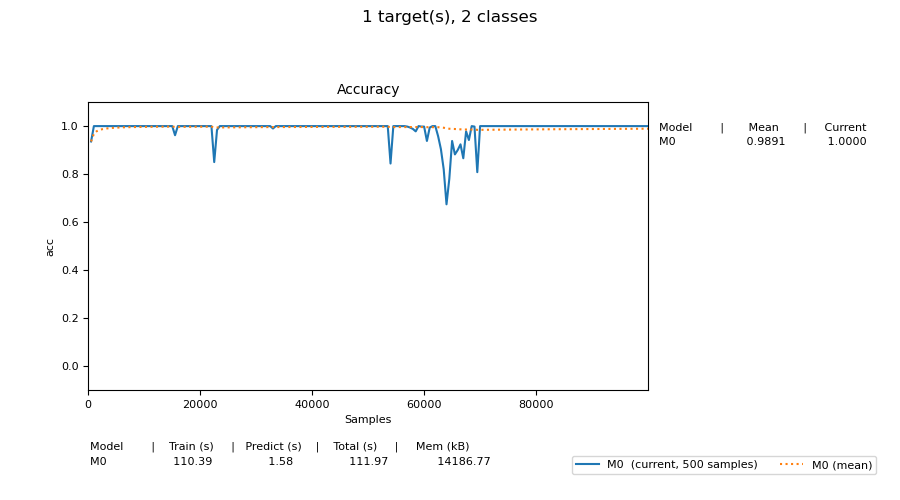

Prequential Evaluation
Evaluating 1 target(s).
Evaluating...
 #################### [100%] [188.47s]
Processed samples: 100000
Mean performance:
M0 - Accuracy     : 0.9891
M0 - Training time (s)  : 110.39
M0 - Testing time  (s)  : 1.58
M0 - Total time    (s)  : 111.97
M0 - Size (kB)          : 14186.7744


[SAMKNNClassifier(ltm_size=0.4, max_window_size=None, min_stm_size=50,
                  n_neighbors=3, stm_size_option='maxACCApprox', use_ltm=False,
                  weighting='uniform')]

In [12]:
# Evaluate
evaluator.evaluate(stream=stream, model=classifier)

In [13]:
#Setup stream
stream= DataStream (data, target_idx=-1, n_targets=1, cat_features=None, name=None, allow_nan=False)

In [14]:
# Setup the evaluator
evaluator = EvaluatePrequential(pretrain_size=0, batch_size=1,
                                n_wait=500, output_file=None,
                                show_plot=True, metrics=['precision','recall', 'f1'])

<IPython.core.display.Javascript object>


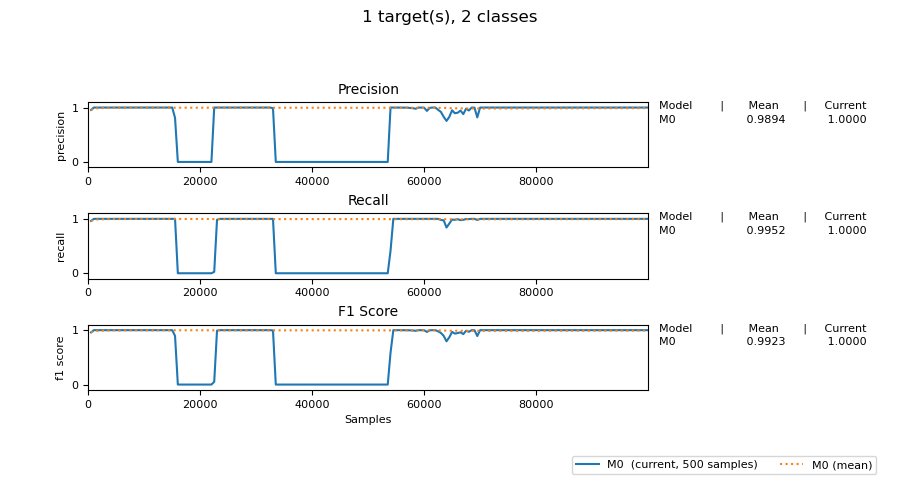

Prequential Evaluation
Evaluating 1 target(s).
Evaluating...
 #################### [100%] [120.03s]
Processed samples: 100000
Mean performance:
M0 - Precision: 0.9894
M0 - Recall: 0.9952
M0 - F1 score: 0.9923


[SAMKNNClassifier(ltm_size=0.4, max_window_size=None, min_stm_size=50,
                  n_neighbors=3, stm_size_option='maxACCApprox', use_ltm=False,
                  weighting='uniform')]

In [15]:
# Evaluate
evaluator.evaluate(stream=stream, model=classifier)